# Exploring the Seattle airbnb dataset

This notebook aims to explore the seattle airbnb dataset using the CRISP DM process. I will start by importing the libraries I intend to use in my analysis. After that, I read the CSVs and convert them into dataframes that I can use in pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

listings_df = pd.read_csv('./listings.csv')
reviews_df = pd.read_csv('./reviews.csv')
calendar_df = pd.read_csv('./calendar.csv')
listings_df.head()



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## Understanding the Data

I'll look at the shape and columns of the dataset to see if there are any columns that interest me. This is a crucial step of the CRISP DM process as it enables us to understand the structure of the data. I will also describe the data to get a feel of what the conrinuous columns look like. 

In [2]:
listings_df.shape

(3818, 92)

In [3]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


Now I try to understand the data. I look at the continuous variables of the dataset and see how they are skewed

<Figure size 432x288 with 0 Axes>

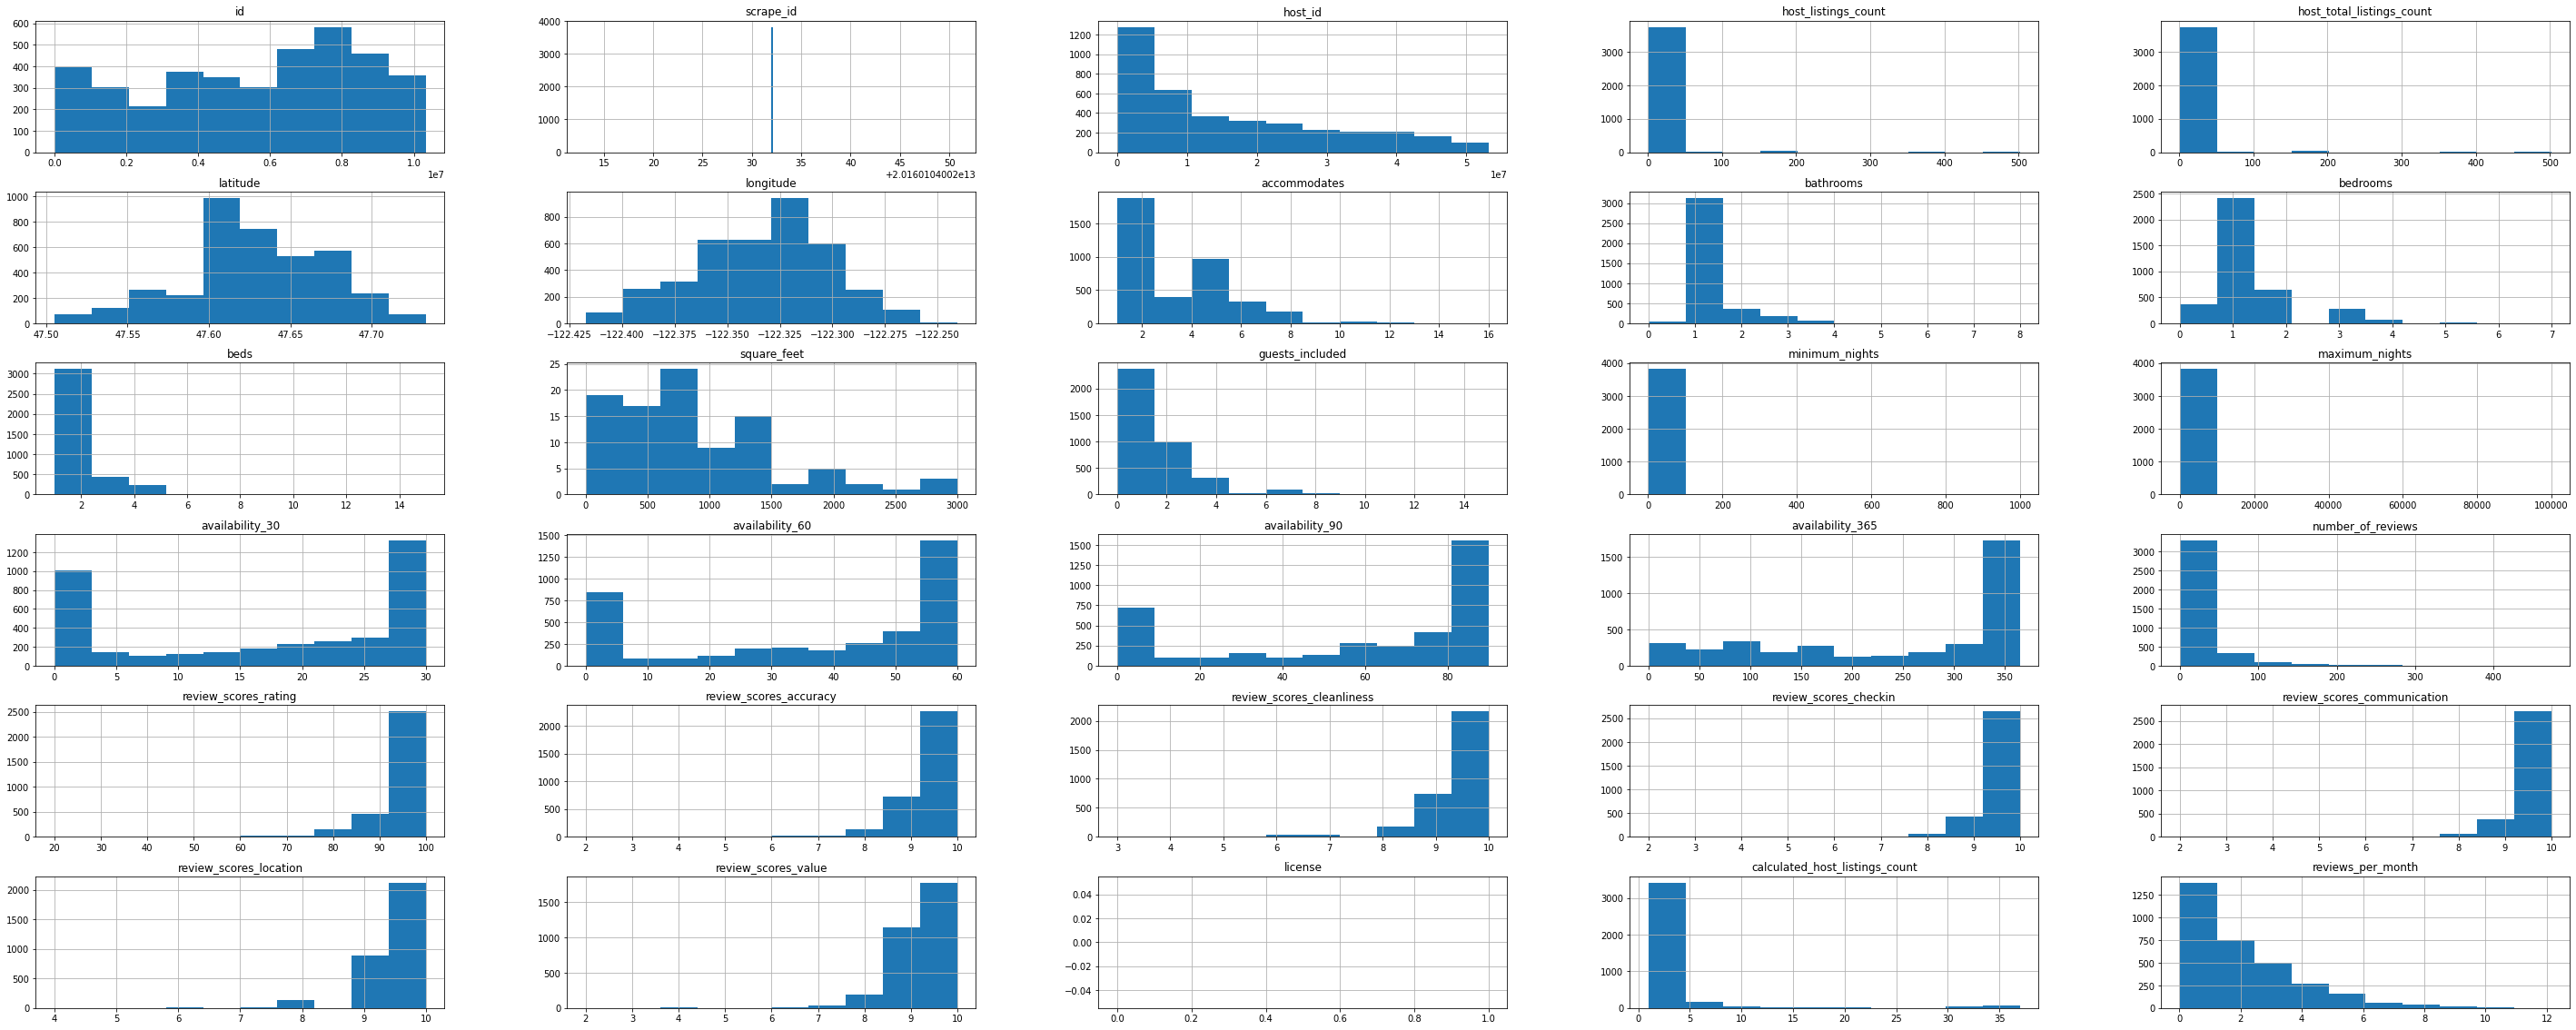

In [5]:
plt.tight_layout();
listings_df.hist(figsize=(50, 20));

From the above, I see that: 
1. there are 3818 rows and 92 columns in my dataset. 
2. I also notice that price fields don't show up when I list the continuous variables. That is possibly caused by the $ sign.
3. Some fields like license contain nan values. They need to be cleaned up

## Preparing the data

Now I remove the $ from the price fields

In [6]:
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float");
listings_df['weekly_price'] = listings_df['weekly_price'].str.replace("[$, ]", "").astype("float");
listings_df['monthly_price'] = listings_df['monthly_price'].str.replace("[$, ]", "").astype("float");


<ipython-input-6-9179a6839e45>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float");
<ipython-input-6-9179a6839e45>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listings_df['weekly_price'] = listings_df['weekly_price'].str.replace("[$, ]", "").astype("float");
<ipython-input-6-9179a6839e45>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  listings_df['monthly_price'] = listings_df['monthly_price'].str.replace("[$, ]", "").astype("float");


I also looked at the columns of the other dataframes and I have noticed that the listing id is called listing_id so I'm going to change it from id to make it easier when I need to merge the files.

In [7]:
listings_df.rename(columns={'id':'listing_id'}, inplace=True)

## Questions that need answers

Having played around with the data, my curious mind has come up with the following questions that I'll try to answer using the CRISP DM
1. Which Seattle neighbourhoods are the earn the highest revenue?
2. Which accommodation size receives the highest number of bookings?
3. How well can we predict listing price?

### 1. Which Seattle neighbourhoods are the earn the highest revenue?

We do not have a revenue column in our dataset so I will assume that each review was a stay at a listing. This would give us an estimated number of stays at each listing, but we do not know how long each stay was. To estimate this I will use the minimum number of days. With this I can calculate the estimated revenue for each neighbourhood as illustrated below.

In [8]:
bookings_df = pd.merge(reviews_df, listings_df, on='listing_id')
bookings_df.shape

(84849, 97)

In [9]:
bookings_df['listing_estimated_revenue'] = bookings_df['price'] * bookings_df['minimum_nights']


In [10]:
listings_revenue_df = bookings_df[['listing_id','listing_estimated_revenue']].groupby(by='listing_id').sum()


In [11]:
listings_revenue_df.shape

(3191, 1)

In [12]:
new_listings_df = pd.merge(listings_df, listings_revenue_df, on='listing_id', how='right')


In [13]:
new_listings_df.shape

(3191, 93)

In [14]:
new_listings_df[['neighbourhood','listing_estimated_revenue']].groupby(by='neighbourhood').mean().sort_values(by='listing_estimated_revenue', ascending=False).head()

,listing_estimated_revenue
neighbourhood,
Harrison/Denny-Blaine,20240.000000
Pike Place Market,19180.161290
Central Business District,11428.394366
First Hill,11324.303371
South Delridge,10685.285714


From the above, We see that the neighbourhoods with the highest possible revenue are:
1. Harrison/Denny-Blaine
2. Pike place market
3. Central Business District
4. First Hill
5. Southern Delridge

### 2. Which accommodation size receives the highest number of bookings?

In [15]:
accommodates_values = bookings_df.accommodates.value_counts()

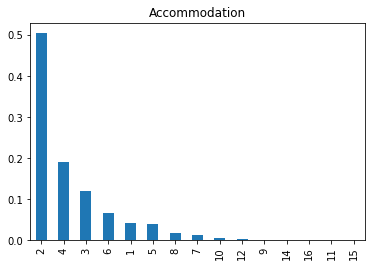

In [16]:
(accommodates_values/bookings_df.shape[0]).plot(kind="bar");
plt.title("Accommodation");

From the above analysis, we learn that properties that accommodate 2 people account for over half of the total bookings. 

### 3. How well can we predict listing price?

This is the most interesting because its where we create the model.We first clean up the data by imputing values for categorical variables. We then split the data into training and test data. After this, we instantiate the linear regression model and fit our training data into the model. 

In [17]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Select the numeric variables in the dataset
    2. Imputes the mean to fill null values for numeric variables
    3. Select the categorical variables
    4. Creates dummy columns for the categorical variables
    5. Create X as all the columns that are not the Price column
    6. Create y as the Price column

    '''
  
    num_vars= df.select_dtypes(include=['int','float']).copy().columns

   
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)

   
    cat_vars = df.select_dtypes(include=['object']).copy().columns

   
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
   
    X = df.drop(columns=['price'], axis=1)
    y = df['price']
    
    return X, y

In [18]:
filtered_df = listings_df[[ "host_is_superhost","host_listings_count", "neighbourhood_cleansed", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

X, y = clean_data(filtered_df)

/Users/mac/venv/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [20]:
X_train.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,reviews_per_month,host_is_superhost_t,neighbourhood_cleansed_Alki,...,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
1187,4.0,2,1.0,1.0,1.0,8,100.0,0.47,0,0,...,0,0,0,0,0,0,1,0,0,1
859,3.0,2,1.0,1.0,1.0,1,100.0,1.00,0,0,...,0,0,0,0,0,0,1,0,0,0
533,1.0,4,1.0,3.0,3.0,1,100.0,0.21,0,0,...,0,0,0,0,0,0,0,0,0,1
3105,2.0,3,1.5,1.0,3.0,42,96.0,2.47,0,0,...,0,0,0,0,0,0,1,0,1,0
2761,1.0,1,1.0,1.0,1.0,2,100.0,0.44,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(normalize=True)

In [22]:
#Predict and score the model
y_train_preds = lm_model.predict(X_train)
print("The r-squared score for the model on the training data was {} on {} values. The RMSE was {}".format(r2_score(y_train, y_train_preds), len(y_train), mean_squared_error(y_train, y_train_preds)))
y_test_preds = lm_model.predict(X_test) 
print("The r-squared score for the model on the test data was {} on {} values.  The RMSE was {}".format(r2_score(y_test, y_test_preds), len(y_test), mean_squared_error(y_test, y_test_preds)))


The r-squared score for your model on the training data was 0.5926903081943571 on 2672 values. The RMSE was 3242.596553930906
The r-squared score for your model on the test data was 0.5975240944346538 on 1146 values.  The RMSE was 3446.6221734160763


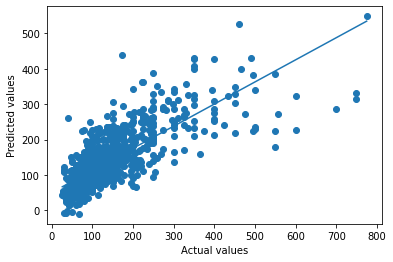

In [23]:
plt.scatter(y_test, y_test_preds)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_preds, 1))(np.unique(y_test)))

To better visualise the data, I created a chart that shows the actual values against the predicted values on the same planes. This was inspired by this post.

plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

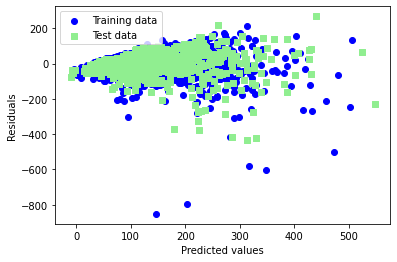

In [24]:
plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

As illustrated in the above diagrams, the prediction model is not too far from the actual results. 